# ANN playground - Play with optimizers, hyperparams and more!

In [25]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import *
from keras.utils import to_categorical
from keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import *

np.random.seed(1671)
tf.__version__


'2.10.1'

### Importing all required modules and preparing the data


In [26]:
NB_CLASSES=10
RESHAPED=784
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(60000,RESHAPED)
X_test=X_test.reshape(10000,RESHAPED)
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
X_train/=255
X_test/=255
y_train=to_categorical(y_train,NB_CLASSES)
y_test=to_categorical(y_test,NB_CLASSES)

### function to plot loss and accuracy of the model

In [27]:
def plotting(training):# summarize history for accuracy
    plt.plot(training.history['accuracy'])
    plt.plot(training.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

def f1_score(y_true, y_pred):
    precision.update_state(y_true, y_pred)  # Update metrics state
    recall.update_state(y_true, y_pred)
    return 2 * ((precision.result() * recall.result()) / (precision.result() + recall.result()))


# Model-1 

### Defining hyperparameters and training the model

In [28]:
NB_EPOCH=200
BATCH_SIZE=128
VERBOSE=1
OPTIMIZER=SGD()
N_HIDDEN=128
VALIDATION_SPLIT=0.3
# DROPOUT=0.25
model1=Sequential()
model1.add(Dense(NB_CLASSES,input_shape=(RESHAPED,)))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',precision,recall,f1_score])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                7850      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [29]:
training1=model1.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Epoch 1/200
329/329 [==============================] - 2s 5ms/step - loss: 1.4520 - accuracy: 0.6473 - precision_1: 0.9914 - recall_1: 0.1345 - f1_score: nan - val_loss: 0.9714 - val_accuracy: 0.8111 - val_precision_1: 0.9885 - val_recall_1: 0.3883 - val_f1_score: 0.5471
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.8377 - accuracy: 0.8255 - precision_1: 0.9750 - recall_1: 0.5108 - f1_score: 0.6201 - val_loss: 0.7113 - val_accuracy: 0.8485 - val_precision_1: 0.9735 - val_recall_1: 0.6231 - val_f1_score: 0.7451
Epoch 3/200
329/329 [==============================] - 1s 3ms/step - loss: 0.6728 - accuracy: 0.8498 - precision_1: 0.9639 - recall_1: 0.6540 - f1_score: 0.7623 - val_loss: 0.6062 - val_accuracy: 0.8601 - val_precision_1: 0.9643 - val_recall_1: 0.7083 - val_f1_score: 0.8019
Epoch 4/200
329/329 [==============================] - 1s 3ms/step - loss: 0.5932 - accuracy: 0.8605 - precision_1: 0.9565 - recall_1: 0.7162 - f1_score: 0.8095 - val_loss: 0.547

In [30]:
score=model1.evaluate(X_test,y_test,verbose=VERBOSE)

313/313 [==============================] - 1s 3ms/step - loss: 0.2799 - accuracy: 0.9221 - precision_1: 0.9408 - recall_1: 0.9047 - f1_score: 0.9106


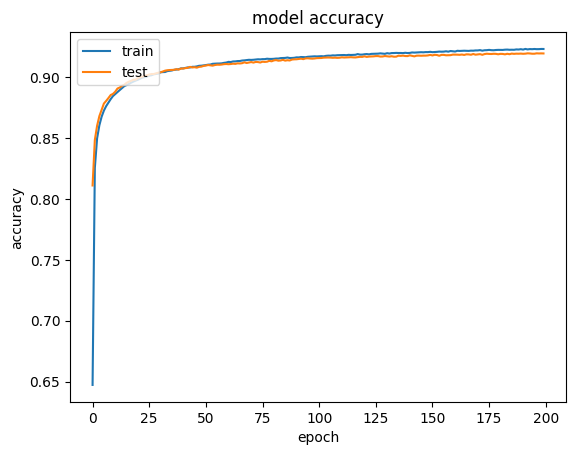

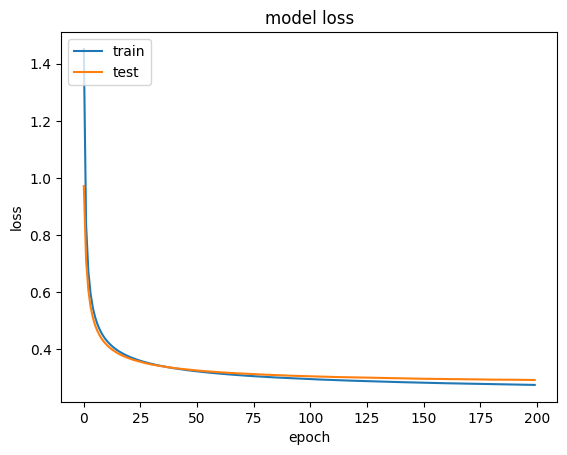

In [31]:
plotting(training1)

# MODEL-2
### Similar model, different parameters

In [32]:
NB_EPOCH=100#changed this
BATCH_SIZE=64#changed this
VERBOSE=1
OPTIMIZER=Adam()#changed this
N_HIDDEN=128
VALIDATION_SPLIT=0.2
# DROPOUT=0.25
model2=Sequential()
model2.add(Dense(NB_CLASSES,input_shape=(RESHAPED,)))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',precision,recall,f1_score])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                7850      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
training2=model2.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 0.5980 - accuracy: 0.8493 - precision_1: 0.9436 - recall_1: 0.7423 - f1_score: 0.7974 - val_loss: 0.3486 - val_accuracy: 0.9068 - val_precision_1: 0.9454 - val_recall_1: 0.8641 - val_f1_score: 0.8955
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3431 - accuracy: 0.9057 - precision_1: 0.9388 - recall_1: 0.8727 - f1_score: 0.9023 - val_loss: 0.3059 - val_accuracy: 0.9143 - val_precision_1: 0.9424 - val_recall_1: 0.8901 - val_f1_score: 0.9082
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3090 - accuracy: 0.9142 - precision_1: 0.9387 - recall_1: 0.8906 - f1_score: 0.9136 - val_loss: 0.2862 - val_accuracy: 0.9196 - val_precision_1: 0.9426 - val_recall_1: 0.9008 - val_f1_score: 0.9145
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2935 - accuracy: 0.9180 - precision_1: 0.9400 - recall_1: 0.8980 - f1_score: 0.9184 - val_loss: 0.

In [37]:
score=model2.evaluate(X_test,y_test,verbose=VERBOSE)

313/313 [==============================] - 1s 3ms/step - loss: 0.2899 - accuracy: 0.9255 - precision_1: 0.9377 - recall_1: 0.9173 - f1_score: 0.9172


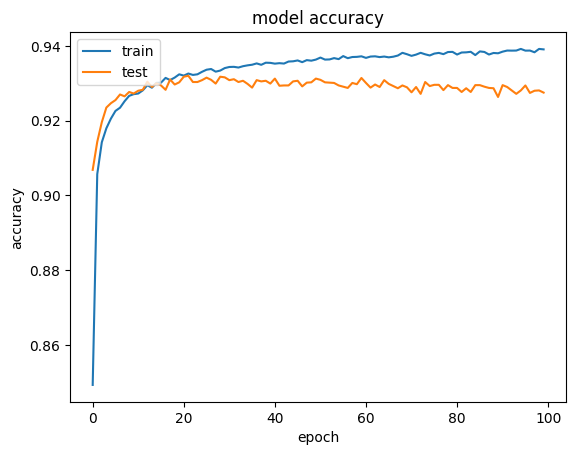

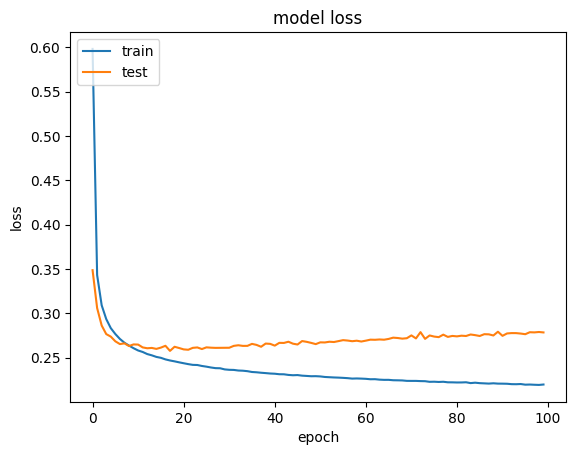

In [38]:
plotting(training2)



# MODEL-3

In [43]:
NB_EPOCH=80
BATCH_SIZE=128
VERBOSE=1
OPTIMIZER=SGD()
N_HIDDEN=128
VALIDATION_SPLIT=0.2
# DROPOUT=0.25
model3=Sequential()
model3.add(Dense(128, activation='relu', input_shape=(784,)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))  
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',precision,recall,f1_score])
model3.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               100480    
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [44]:
training3=model3.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Epoch 1/80
375/375 [==============================] - 2s 4ms/step - loss: 1.5997 - accuracy: 0.5302 - precision_1: 0.9717 - recall_1: 0.2869 - f1_score: 0.5366 - val_loss: 0.8984 - val_accuracy: 0.7813 - val_precision_1: 0.9482 - val_recall_1: 0.4377 - val_f1_score: 0.5957
Epoch 2/80
375/375 [==============================] - 1s 3ms/step - loss: 0.6733 - accuracy: 0.8208 - precision_1: 0.9339 - recall_1: 0.6546 - f1_score: 0.7015 - val_loss: 0.4860 - val_accuracy: 0.8692 - val_precision_1: 0.9345 - val_recall_1: 0.7947 - val_f1_score: 0.8464
Epoch 3/80
375/375 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.8742 - precision_1: 0.9287 - recall_1: 0.8148 - f1_score: 0.8600 - val_loss: 0.3735 - val_accuracy: 0.8923 - val_precision_1: 0.9331 - val_recall_1: 0.8539 - val_f1_score: 0.8803
Epoch 4/80
375/375 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8936 - precision_1: 0.9304 - recall_1: 0.8568 - f1_score: 0.8890 - val_loss: 0.3252

In [45]:
score=model3.evaluate(X_test,y_test,verbose=VERBOSE)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9726 - precision_1: 0.9753 - recall_1: 0.9702 - f1_score: 0.9657


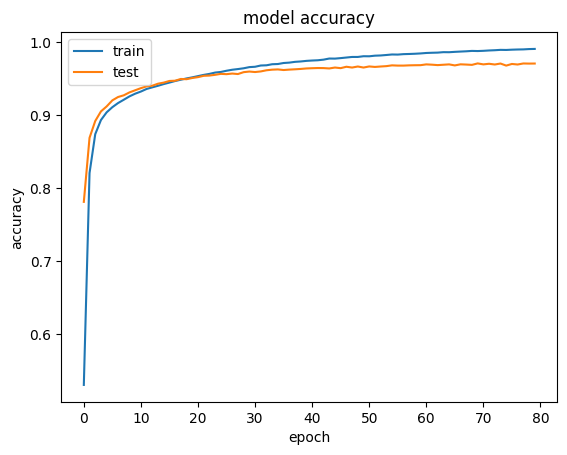

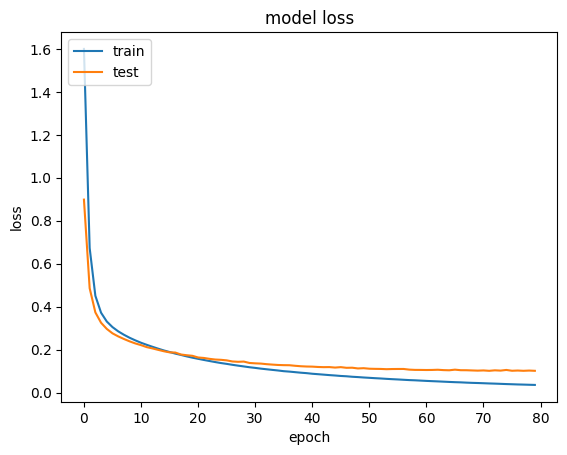

In [46]:
plotting(training3)

# MODEL-4

In [47]:
NB_EPOCH=200
BATCH_SIZE=256
VERBOSE=1
OPTIMIZER=Adam()
N_HIDDEN=128
VALIDATION_SPLIT=0.3
DROPOUT=0.25
model4=Sequential()
model4.add(Dense(128, activation='LeakyReLU', input_shape=(784,)))
model4.add(Dropout(DROPOUT))
model4.add(Dense(64, activation='LeakyReLU'))
model4.add(Dropout(DROPOUT))
model4.add(Dense(32, activation='relu'))  
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',precision,recall,f1_score])
model4.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-t

In [48]:
training4=model4.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Epoch 1/200
165/165 [==============================] - 2s 7ms/step - loss: 0.6981 - accuracy: 0.7857 - precision_1: 0.9175 - recall_1: 0.7353 - f1_score: 0.7933 - val_loss: 0.2906 - val_accuracy: 0.9117 - val_precision_1: 0.9347 - val_recall_1: 0.8936 - val_f1_score: 0.9046
Epoch 2/200
165/165 [==============================] - 1s 5ms/step - loss: 0.3236 - accuracy: 0.9027 - precision_1: 0.9293 - recall_1: 0.8806 - f1_score: 0.8975 - val_loss: 0.2324 - val_accuracy: 0.9308 - val_precision_1: 0.9464 - val_recall_1: 0.9174 - val_f1_score: 0.9237
Epoch 3/200
165/165 [==============================] - 1s 5ms/step - loss: 0.2627 - accuracy: 0.9227 - precision_1: 0.9411 - recall_1: 0.9054 - f1_score: 0.9206 - val_loss: 0.1928 - val_accuracy: 0.9423 - val_precision_1: 0.9548 - val_recall_1: 0.9323 - val_f1_score: 0.9357
Epoch 4/200
165/165 [==============================] - 1s 6ms/step - loss: 0.2295 - accuracy: 0.9308 - precision_1: 0.9459 - recall_1: 0.9187 - f1_score: 0.9313 - val_loss: 0.

In [51]:
score=model4.evaluate(X_test,y_test,verbose=VERBOSE)

313/313 [==============================] - 1s 3ms/step - loss: 0.1156 - accuracy: 0.9749 - precision_1: 0.9763 - recall_1: 0.9743 - f1_score: 0.9714


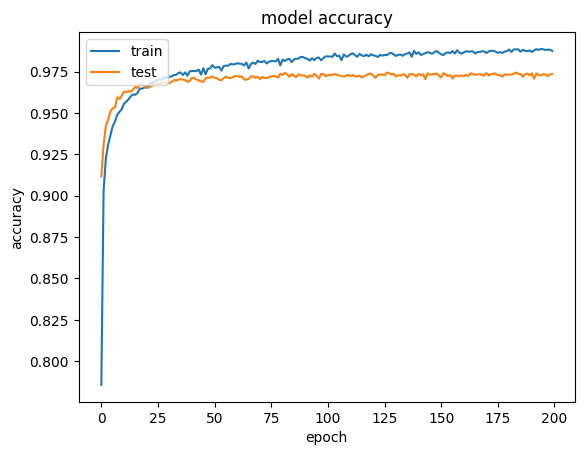

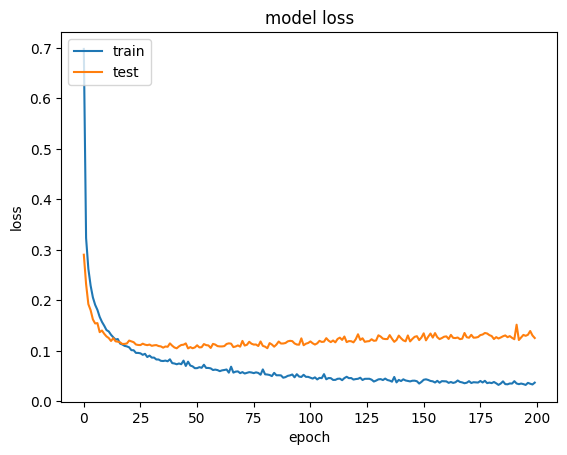

In [52]:
plotting(training4)

# FINAL SUMMARY